# PyBer Analysis

In [1]:
# Magic Command
%matplotlib inline

# Import Dependencies
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import scipy.stats as sts

In [2]:
# Files to Load
city_data_to_load = 'Resources/city_data.csv'
ride_data_to_load = 'Resources/ride_data.csv'

In [3]:
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [4]:
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [5]:
city_data_df.shape

(120, 3)

In [6]:
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [7]:
ride_data_df.shape

(2375, 4)

## Inspect the Data

In [8]:
city_data_df.count()

city            120
driver_count    120
type            120
dtype: int64

In [9]:
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [10]:
# Make sure the driver_count field is numeric since we will be doing 
# calculations on this field.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [11]:
# Get the unique types of cities.
city_data_df['type'].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [12]:
# Get the number of data points from the Urban Cities.
sum(city_data_df['type']=='Urban')

66

In [13]:
sum(city_data_df['type']=='Suburban')

36

In [14]:
sum(city_data_df['type']=='Rural')

18

In [15]:
# Inspect Ride Data DataFrame

# Get the columnsand rows that are not null
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [16]:
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [17]:
# Get the data types of each column
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

### Merge the Two DataFrames

In [18]:
pyber_data_df = pd.merge(ride_data_df, 
                         city_data_df, 
                         how='left', 
                         on=['city', 'city'])

In [19]:
pyber_data_df.to_csv('temp.csv')

In [20]:
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [21]:
pyber_data_df.shape

(2375, 6)

### 5.3.1 - Create DataFrames for Each Type of City

In [22]:
# Urban Cities DataFrame
urban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Urban']
urban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [23]:
# Suburban Cities DataFrame
suburban_cities_df = pyber_data_df[pyber_data_df['type'] == 'Suburban']
suburban_cities_df.head()

,city,date,fare,ride_id,driver_count,type
1625,Barronchester,2019-01-27 03:08:01,27.79,6653622887913,11,Suburban
1626,East Kentstad,2019-04-07 19:44:19,18.75,6575961095852,20,Suburban
1627,Lake Omar,2019-01-17 21:33:35,21.71,966911700371,22,Suburban
1628,Myersshire,2019-02-27 17:38:39,17.10,5706770909868,19,Suburban
1629,West Hannah,2019-04-19 01:06:59,37.78,2273047151891,12,Suburban


In [24]:
# Rural Cities DataFrame
rural_cities_df = pyber_data_df[pyber_data_df['type'] == 'Rural']
rural_cities_df.head()

,city,date,fare,ride_id,driver_count,type
2250,Randallchester,2019-04-13 11:13:31,43.22,1076079536213,9,Rural
2251,North Holly,2019-02-02 14:54:00,12.42,1985256326182,8,Rural
2252,Michaelberg,2019-03-27 18:27:34,54.85,4421836952718,6,Rural
2253,Lake Latoyabury,2019-02-23 21:12:24,47.90,3269652929887,2,Rural
2254,Lake Latoyabury,2019-05-06 08:57:56,51.80,4018025271936,2,Rural


In [25]:
# Get the number of rides for each type of city.
urban_ride_count = urban_cities_df.groupby(['city']).count()['ride_id']
suburban_ride_count = suburban_cities_df.groupby(['city']).count()['ride_id']
rural_ride_count = rural_cities_df.groupby(['city']).count()['ride_id']

In [26]:
# Get the average fare for each type of city
urban_avg_fare = urban_cities_df.groupby(['city']).mean()['fare']
suburban_avg_fare = suburban_cities_df.groupby(['city']).mean()['fare']
rural_avg_fare = rural_cities_df.groupby(['city']).mean()['fare']

In [27]:
# Get  the average number of drivers for each city type
urban_driver_count = urban_cities_df.groupby(['city']).mean()['driver_count']
suburban_driver_count = suburban_cities_df.groupby(['city']).mean()['driver_count']
rural_driver_count = rural_cities_df.groupby(['city']).mean()['driver_count']

### Create Bubble Charts

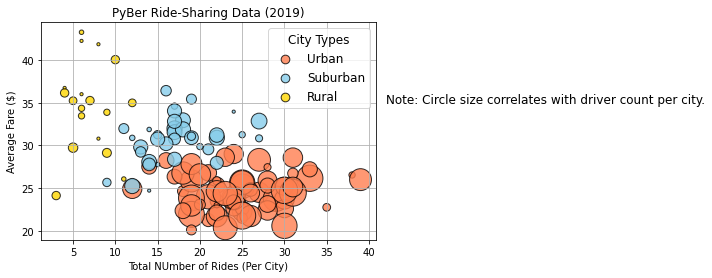

In [28]:
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=10 * urban_driver_count, 
            color='coral', alpha=0.8, 
            edgecolor='black', linewidths=1,
            label='Urban')
plt.scatter(suburban_ride_count, 
            suburban_avg_fare, 
            s=10 * suburban_driver_count, 
            color='skyblue',  alpha=0.8, 
            edgecolor='black', linewidths=1,
            label='Suburban')
plt.scatter(rural_ride_count, 
            rural_avg_fare, 
            s=10 * rural_driver_count, 
            color='gold',  alpha=0.8, 
            edgecolor='black', linewidths=1,
            label='Rural')

# Add Title to Chart
plt.title("PyBer Ride-Sharing Data (2019)")

# Show Legend
lgnd = plt.legend(fontsize='12', mode='Expanded',
                  scatterpoints=1, loc='best', title='City Types')
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Set axis labels
plt.xlabel('Total NUmber of Rides (Per City)')
plt.ylabel('Average Fare ($)')

# Add grid lines
plt.grid(True)

# Add text label note about circle size.
plt.text(42, 35, 'Note: Circle size correlates with driver count per city.', fontsize='12')

# Save the figure
plt.savefig('Analysis/Fig1.png')

## 5.4.1 - Summary Statistics for Number of Rides by City Type

In [29]:
# Three ways to do this.
# Pandas describe() function
# Pandas mean(), median(), and mode() methods
# NumPy mean() and median() functions and SciPy states mode() function on a series.

In [30]:
# Pandas describe() function
urban_cities_df.describe()

,fare,ride_id,driver_count
count,1625.000000,1.625000e+03,1625.000000
mean,24.525772,4.873485e+12,36.678154
std,11.738649,2.907440e+12,20.075545
min,4.050000,1.458810e+10,3.000000
25%,14.550000,2.400244e+12,22.000000
50%,24.640000,4.711188e+12,37.000000
75%,34.580000,7.451579e+12,52.000000
max,44.970000,9.991538e+12,73.000000


In [31]:
urban_ride_count.describe()

count    66.000000
mean     24.621212
std       5.408726
min      12.000000
25%      21.000000
50%      24.000000
75%      28.000000
max      39.000000
Name: ride_id, dtype: float64

In [32]:
suburban_ride_count.describe()

count    36.000000
mean     17.361111
std       4.323707
min       9.000000
25%      14.000000
50%      17.000000
75%      19.250000
max      27.000000
Name: ride_id, dtype: float64

In [33]:
rural_ride_count.describe()

count    18.000000
mean      6.944444
std       2.508157
min       3.000000
25%       5.250000
50%       6.000000
75%       8.750000
max      12.000000
Name: ride_id, dtype: float64

In [34]:
# Calculate the mean of the ride count for each city type
round(urban_ride_count.mean(),2), round(suburban_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [35]:
urban_ride_count.median()

24.0

In [36]:
urban_ride_count.mode()

0    22
1    25
dtype: int64

In [37]:
suburban_ride_count.mode()

0    17
dtype: int64

### Use NumPy and SciPy to calculate measures of central tendency.
#### Mean, Median & Mode

In [38]:
mean_urban_ride_count = np.mean(urban_ride_count)
print(f'The mean for the ride counts for urban trips is {mean_urban_ride_count:.2f}.')

median_urban_ride_count = np.median(urban_ride_count)
print(f'The median for the ride counts for urban trips is {median_urban_ride_count:.2f}.')

mode_urban_ride_count = sts.mode(urban_ride_count)
print(f'The mode for the ride counts for urban trips is {mode_urban_ride_count}.')

The mean for the ride counts for urban trips is 24.62.
The median for the ride counts for urban trips is 24.00.
The mode for the ride counts for urban trips is ModeResult(mode=array([22], dtype=int64), count=array([7])).


In [39]:
mean_suburban_ride_count = np.mean(suburban_ride_count)
print(f'The mean for the ride counts for suburban trips is {mean_suburban_ride_count:.2f}.')

median_suburban_ride_count = np.median(suburban_ride_count)
print(f'The median for the ride counts for suburban trips is {median_suburban_ride_count:.2f}.')

mode_suburban_ride_count = sts.mode(suburban_ride_count)
print(f'The mode for the ride counts for suburban trips is {mode_suburban_ride_count}.')

The mean for the ride counts for suburban trips is 17.36.
The median for the ride counts for suburban trips is 17.00.
The mode for the ride counts for suburban trips is ModeResult(mode=array([17], dtype=int64), count=array([7])).


In [40]:
mean_rural_ride_count = np.mean(rural_ride_count)
print(f'The mean for the ride counts for rural trips is {mean_rural_ride_count:.2f}.')

median_rural_ride_count = np.median(rural_ride_count)
print(f'The median for the ride counts for rural trips is {median_rural_ride_count:.2f}.')

mode_rural_ride_count = sts.mode(rural_ride_count)
print(f'The mode for the ride counts for rural trips is {mode_rural_ride_count}.')

The mean for the ride counts for rural trips is 6.94.
The median for the ride counts for rural trips is 6.00.
The mode for the ride counts for rural trips is ModeResult(mode=array([6], dtype=int64), count=array([5])).


### Summary Statistics for the Fare by City Type

In [41]:
# Get the fares for the urban cities.
urban_fares = urban_cities_df['fare']
urban_fares.head()

0    13.83
1    30.24
2    33.44
3    23.44
4    34.58
Name: fare, dtype: float64

In [42]:
# Calculate the measures of central tendency for the average fare for the urban cities.
mean_urban_fares = np.mean(urban_fares)
print(f'The mean fare price for urban trips is ${mean_urban_fares:.2f}.')

median_urban_fares = np.median(urban_fares)
print(f'The median fare price for urban trips is ${median_urban_fares:.2f}.')

mode_urban_fares = sts.mode(urban_fares)
print(f'The mode fare price for urban trips is ${mode_urban_fares}.')

The mean fare price for urban trips is $24.53.
The median fare price for urban trips is $24.64.
The mode fare price for urban trips is $ModeResult(mode=array([22.86]), count=array([5])).


In [43]:
# Get the fares for suburban cities
suburban_fares = suburban_cities_df['fare']

# Calculate the measures of central tendency for the average fare for the suburban cities.
mean_suburban_fares = np.mean(suburban_fares)
print(f'The mean fare price for suburban trips is ${mean_suburban_fares:.2f}.')

median_suburban_fares = np.median(suburban_fares)
print(f'The median fare price for suburban trips is ${median_suburban_fares:.2f}.')

mode_suburban_fares = sts.mode(suburban_fares)
print(f'The mode fare price for suburban trips is ${mode_suburban_fares}.')

The mean fare price for suburban trips is $30.97.
The median fare price for suburban trips is $30.75.
The mode fare price for suburban trips is $ModeResult(mode=array([17.99]), count=array([3])).


In [44]:
# Get the fares for rural cities
rural_fares = rural_cities_df['fare']

# Calculate the measures of central tendency for the average fare for the rural cities.
mean_rural_fares = np.mean(rural_fares)
print(f'The mean fare price for rural trips is ${mean_rural_fares:.2f}.')

median_rural_fares = np.median(rural_fares)
print(f'The median fare price for rural trips is ${median_rural_fares:.2f}.')

mode_rural_fares = sts.mode(rural_fares)
print(f'The mode fare price for rural trips is ${mode_rural_fares}.')

The mean fare price for rural trips is $34.62.
The median fare price for rural trips is $37.05.
The mode fare price for rural trips is $ModeResult(mode=array([37.05]), count=array([2])).


### 5.4.3 - Summary Statistics for the Number of Drivers by City Type

In [45]:
# Get driver count data for eacy city type
urban_drivers = urban_cities_df['driver_count']
suburban_drivers = suburban_cities_df['driver_count']
rural_drivers = rural_cities_df['driver_count']
urban_drivers.head()

0     5
1    72
2    57
3    34
4    46
Name: driver_count, dtype: int64

In [46]:
mean_urban_drivers = np.mean(urban_drivers)
mean_urban_drivers

36.67815384615385

In [47]:
mean_suburban_drivers = np.mean(suburban_drivers)
mean_suburban_drivers

13.712

In [48]:
mean_rural_drivers = np.mean(rural_drivers)
mean_rural_drivers

4.296

## 5.4.4 - Create Box-and-Whisker Plots

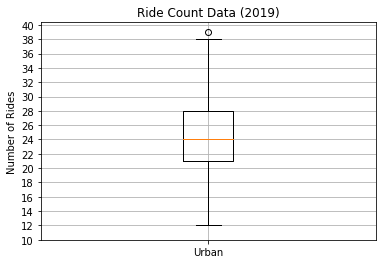

In [49]:
# Urban ride count Box plot
x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count, labels=x_labels)

# Add the title, yaxis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()

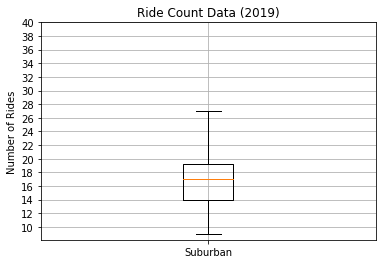

In [50]:
# Suburban ride count Box plot
x_labels = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_ride_count, labels=x_labels)

# Add the title, yaxis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()

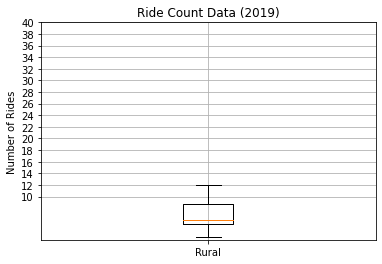

In [51]:
# Rural ride count Box plot
x_labels = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count, labels=x_labels)

# Add the title, yaxis label and grid.
ax.set_title('Ride Count Data (2019)')
ax.set_ylabel('Number of Rides')
ax.set_yticks(np.arange(10, 41, step=2.0))
ax.grid()

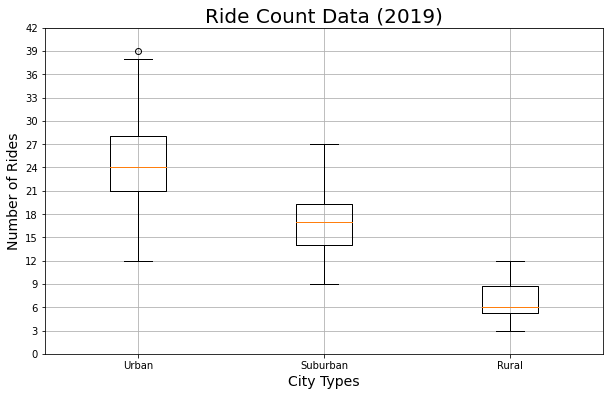

In [52]:
# All ride count in one box and whisker plot
x_labels = ['Urban', 'Suburban', 'Rural']
ride_count_data = [urban_ride_count, suburban_ride_count, rural_ride_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Rides', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(ride_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

# Save the figure
plt.savefig('Analysis/Fig2.png')

In [53]:
# Get the City that matches the outlier 39.
urban_city_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f'{urban_city_outlier} has the highest rider count.')

West Angela has the highest rider count.


### Box-and-Whisker Plots for Ride Fare Data

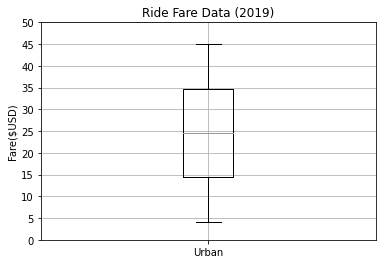

Summary Statistics


count    1625.000000
mean       24.525772
std        11.738649
min         4.050000
25%        14.550000
50%        24.640000
75%        34.580000
max        44.970000
Name: fare, dtype: float64

In [54]:
# Ride Fare Data for Urban fares
x_labels = ['Urban']
fig, ax = plt.subplots()
ax.boxplot(urban_fares, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_fares.describe()

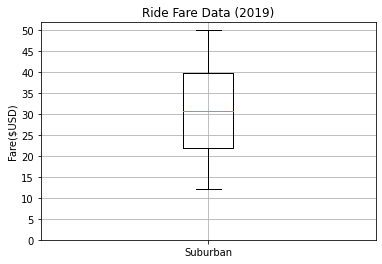

Summary Statistics


count    625.000000
mean      30.970128
std       10.677508
min       12.050000
25%       21.970000
50%       30.750000
75%       39.830000
max       49.960000
Name: fare, dtype: float64

In [55]:
# Ride Fare Data for Suburban fares
x_labels = ['Suburban']
fig, ax = plt.subplots()
ax.boxplot(suburban_fares, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_fares.describe()

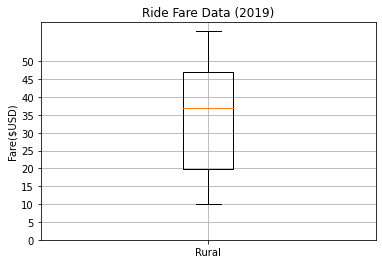

Summary Statistics


count    125.000000
mean      34.623440
std       14.558046
min       10.110000
25%       19.900000
50%       37.050000
75%       47.070000
max       58.550000
Name: fare, dtype: float64

In [56]:
# Ride Fare Data for Rural fares
x_labels = ['Rural']
fig, ax = plt.subplots()
ax.boxplot(rural_fares, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Ride Fare Data (2019)')
ax.set_ylabel('Fare($USD)')
ax.set_yticks(np.arange(0, 51, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_fares.describe()

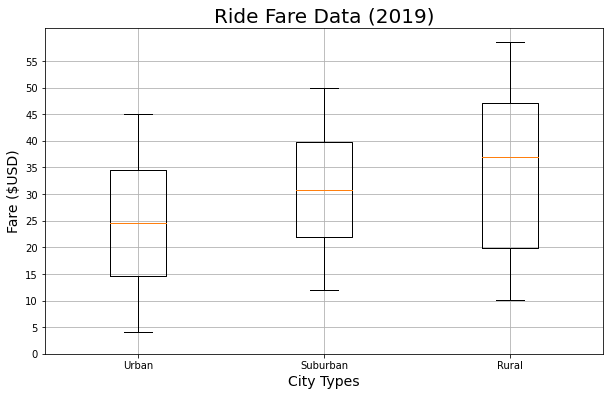

In [57]:
# All ride fare data in one box and whisker plot
x_labels = ['Urban', 'Suburban', 'Rural']
ride_fare_data = [urban_fares, suburban_fares, rural_fares]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Fare Data (2019)', fontsize=20)
ax.set_ylabel('Fare ($USD)', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 59, step=5.0))
ax.grid()

# Save the figure
plt.savefig('Analysis/Fig3.png')

### Box-and-Whisker Plots for Driver Count Data

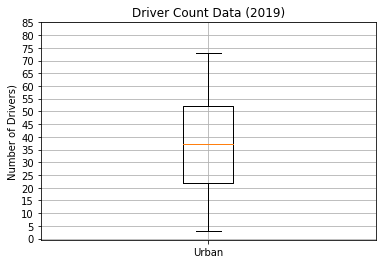

Summary Statistics


count    1625.000000
mean       36.678154
std        20.075545
min         3.000000
25%        22.000000
50%        37.000000
75%        52.000000
max        73.000000
Name: driver_count, dtype: float64

In [58]:
# Create the box-and-whisker plot for the urban driver count data.
x_labels = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_drivers, labels=x_labels)
# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
urban_drivers.describe()

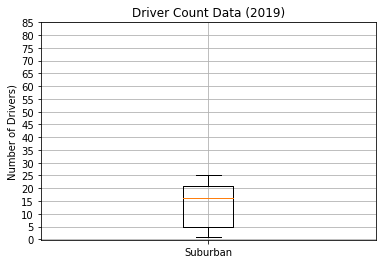

Summary Statistics


count    625.000000
mean      13.712000
std        8.042372
min        1.000000
25%        5.000000
50%       16.000000
75%       21.000000
max       25.000000
Name: driver_count, dtype: float64

In [59]:
# Create the box-and-whisker plot for the Suburban driver count data.
x_labels = ["Suburban"]
fig, ax = plt.subplots()
ax.boxplot(suburban_drivers, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
suburban_drivers.describe()

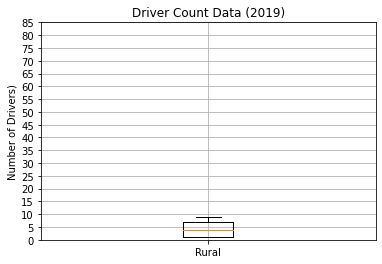

Summary Statistics


count    125.000000
mean       4.296000
std        2.691156
min        1.000000
25%        1.000000
50%        4.000000
75%        7.000000
max        9.000000
Name: driver_count, dtype: float64

In [60]:
# Create the box-and-whisker plot for the Rural driver count data.
x_labels = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_drivers, labels=x_labels)

# Add the title, y-axis label and grid.
ax.set_title('Driver Count Data (2019)')
ax.set_ylabel('Number of Drivers)')
ax.set_yticks(np.arange(0, 90, step=5.0))
ax.grid()
plt.show()
print("Summary Statistics")
rural_drivers.describe()

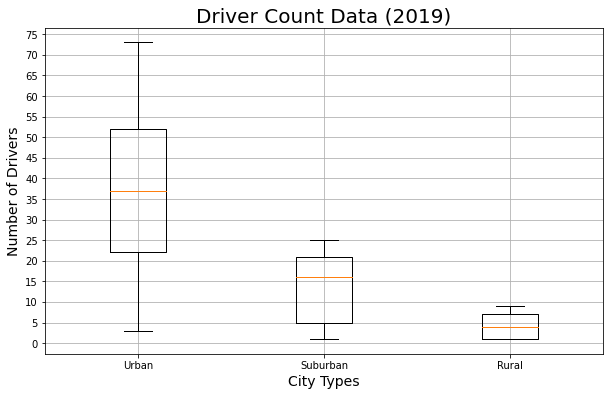

In [61]:
# All driver count data in one box and whisker plot
x_labels = ['Urban', 'Suburban', 'Rural']
ride_fare_data = [urban_drivers, suburban_drivers, rural_drivers]
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_title('Driver Count Data (2019)', fontsize=20)
ax.set_ylabel('Number of Drivers', fontsize=14)
ax.set_xlabel('City Types', fontsize=14)
ax.boxplot(ride_fare_data, labels=x_labels)
ax.set_yticks(np.arange(0, 76, step=5.0))
ax.grid()

# Save the figure
plt.savefig('Analysis/Fig4.png')

## 5.5.1 - Get the Percentage of Fares for Each City Type

In [62]:
# Get the sum of the fares for each city type
sum_fares_by_type = pyber_data_df.groupby(['type']).sum()['fare']
sum_fares_by_type

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [63]:
# Get the total sum of all of the fares.
total_fares = pyber_data_df['fare'].sum()
total_fares

63538.64

In [64]:
# Get the percentage of fares
type_percents = 100 * sum_fares_by_type / total_fares
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

In [65]:
# Same as the two steps above done in one step
type_percents = 100 * pyber_data_df.groupby(['type']).sum()['fare'] / pyber_data_df['fare'].sum()
type_percents

type
Rural        6.811493
Suburban    30.463872
Urban       62.724635
Name: fare, dtype: float64

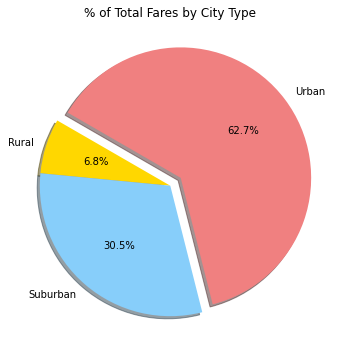

In [66]:
# Create the pie chart
plt.subplots(figsize=(10, 6))
plt.pie(type_percents, 
        labels=['Rural', 'Suburban', 'Urban'],
        colors=['gold', 'lightskyblue', 'lightcoral'],
        explode=[0, 0, 0.1],
        autopct="%1.1f%%",
        startangle=150,
        shadow=True
       )
plt.title('% of Total Fares by City Type')

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig('Analysis/Fig5.png')

## 5.6.1 - Calculate Ride Percentages

In [67]:
# Get the total number of rides for each city type.
# Get the total rides for all the city types.
# Calculate the percentage of the total rides for each city type.

In [68]:
ride_percents = 100 * pyber_data_df.groupby(["type"]).count()['ride_id'] / pyber_data_df['ride_id'].count()
ride_percents

type
Rural        5.263158
Suburban    26.315789
Urban       68.421053
Name: ride_id, dtype: float64

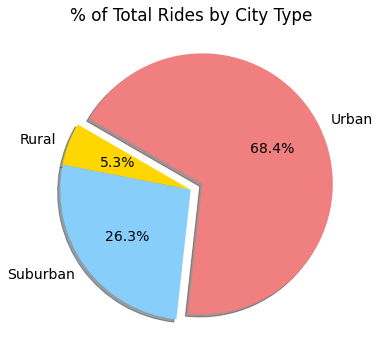

In [69]:
# Create the pie chart
plt.subplots(figsize=(10, 6))
plt.pie(ride_percents, 
        labels=['Rural', 'Suburban', 'Urban'],
        colors=['gold', 'lightskyblue', 'lightcoral'],
        explode=[0, 0, 0.1],
        autopct="%1.1f%%",
        startangle=150,
        shadow=True
       )
plt.title('% of Total Rides by City Type')

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig('Analysis/Fig6.png')

## 5.7.1 - Calculate Driver Percentages

In [70]:
driver_percents = 100 * city_data_df.groupby(['type']).sum()['driver_count'] / city_data_df['driver_count'].sum()
driver_percents = 100 * city_data_df.groupby(["type"]).sum()["driver_count"] / city_data_df["driver_count"].sum()

driver_percents

type
Rural        2.623613
Suburban    16.481668
Urban       80.894719
Name: driver_count, dtype: float64

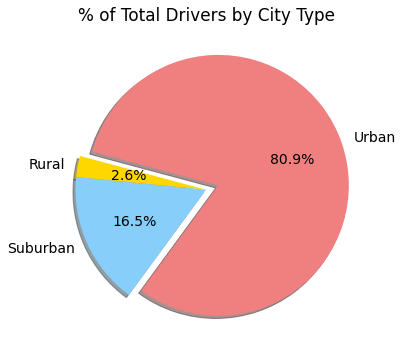

In [71]:
# Create the pie chart
plt.subplots(figsize=(10, 6))
plt.pie(driver_percents, 
        labels=['Rural', 'Suburban', 'Urban'],
        colors=['gold', 'lightskyblue', 'lightcoral'],
        explode=[0, 0, 0.1],
        autopct="%1.1f%%",
        startangle=165,
        shadow=True
       )
plt.title('% of Total Drivers by City Type')

# Change the default font size from 10 to 14.
mpl.rcParams['font.size'] = 14

# Save Figure
plt.savefig('Analysis/Fig7.png')